# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Welcome</p>

![](https://i.imgur.com/3MLsoNa.jpeg)

<div style="border-radius: 10px; border: 2px solid #3498db; padding: 15px; background-color: #000; font-size: 120%; text-align: center; color: #3498db; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="margin: 0; font-weight: bold; font-size: 150%; color: #3498db;">P-Value</p>
    <p style="margin: 10px 0 20px; color: #3498db;">In statistics, a p-value is a measure that helps you assess the evidence against a null hypothesis. The null hypothesis is a statement that there is no effect or no difference. The p-value quantifies the level of evidence against the null hypothesis, and it is used to make decisions in hypothesis testing.</p>
    <p style="margin: 0; color: #3498db;">Make a Decision:If the p-value is below a pre-determined significance level (commonly denoted as α, often set at 0.05), the null hypothesis is rejected in favor of the alternative hypothesis. If the p-value is above the significance level, the null hypothesis is not rejected.A smaller p-value suggests stronger evidence against the null hypothesis. Conversely, a larger p-value suggests weaker evidence against the null hypothesis.</p>
</div>


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Importing Modules and Libraries</p>
</div>


![](https://th.bing.com/th/id/OIP.64z3W4wNM_-7TFm4o5JG0QHaE7?w=249&h=180&c=7&r=0&o=5&pid=1.7)

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler,LabelEncoder,PolynomialFeatures
from sklearn.compose import make_column_selector,ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Data Loading</p>
</div>


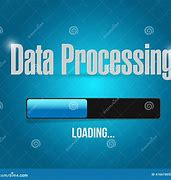

In [2]:
data=pd.read_csv('/kaggle/input/laptop-price-prediction-dataset/data.csv')

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Data Preprocessing</p>
</div>


![](https://th.bing.com/th/id/OIP.uJDXt4slgGIawhuVef0x8QHaEc?w=306&h=184&c=7&r=0&o=5&pid=1.7)

In [3]:
data=data.drop(data.columns[:2],axis=1)
data.spec_rating=round(data.spec_rating)
data.drop('name',axis=1,inplace=True)

In [4]:
data.duplicated().value_counts()

False    891
True       2
Name: count, dtype: int64

In [5]:
data.drop_duplicates(inplace=True)

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Machine Learning</p>
</div>


![](https://theconstructor.org/wp-content/uploads/2021/05/ML1-scaled.jpg)

<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">Taking Numerical Features</p>
</div>


In [6]:
from sklearn.compose import make_column_selector
numerical=make_column_selector(dtype_include='number')(data)
data1=data[numerical]

<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">Finding Relation between features and Target Column</p>
</div>


In [7]:
from sklearn.feature_selection import f_regression
selector=make_column_selector(dtype_include='object')
y=data.price
x=data.drop('price',axis=1)
list1=selector(x)
la=LabelEncoder()
for i in range(len(list1)):
    x[list1[i]]=la.fit_transform(x[list1[i]])

<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">Splitting Data</p>
</div>


![](https://th.bing.com/th/id/OIP.gBBAUtRxGcTjZ7LNRn6MAQHaE8?w=248&h=180&c=7&r=0&o=5&pid=1.7)

In [8]:
xtra,xtest,ytra,ytest=train_test_split(x,y,test_size=0.2,random_state=25)

<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">P-Value Analysis</p>
</div>


![](https://image3.slideserve.com/6872981/interpretation-of-p-value-0-05-l.jpg)

In [9]:
result=f_regression(xtra,ytra)
y=np.where(result[1]<0.05)[0]

In [10]:
xtra.shape

(712, 14)

In [11]:
xtra=xtra.iloc[:,y]

In [12]:
xtest=xtest.iloc[:,y]

<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">Pipelining</p>
</div>


![](https://th.bing.com/th/id/OIP.2LbjXhG9rc4WlV_6mHy_yQHaE8?w=231&h=180&c=7&r=0&o=5&pid=1.7)

In [13]:
pipe1=Pipeline(steps=[('scale',StandardScaler()),('model1',DecisionTreeRegressor())])
pipe2=Pipeline(steps=[('scale',StandardScaler()),('min',MinMaxScaler()),('model2',SVR())])
pipe3=Pipeline(steps=[('scale',StandardScaler()),('min',MinMaxScaler()),('model3',RandomForestRegressor())])
pipe4=Pipeline(steps=[('scale',StandardScaler()),('min',MinMaxScaler()),('model4',LinearRegression())])

In [14]:
pipe5=Pipeline(steps=[('scale',StandardScaler()),('min',MinMaxScaler()),('model5',KNeighborsRegressor())])

In [15]:
pipe1.fit(xtra,ytra)
pipe2.fit(xtra,ytra)
pipe3.fit(xtra,ytra)
pipe4.fit(xtra,ytra)
pipe5.fit(xtra,ytra)


Pipeline(steps=[('scale', StandardScaler()), ('min', MinMaxScaler()),
                ('model5', KNeighborsRegressor())])

In [16]:
ypred1=pipe1.predict(xtest)
ypred2=pipe2.predict(xtest)
ypred3=pipe3.predict(xtest)
ypred4=pipe4.predict(xtest)
ypred5=pipe5.predict(xtest)

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Result</p>

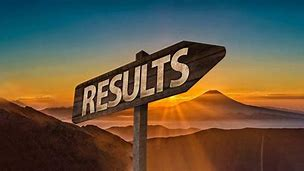

In [17]:
print('Results:\n',r2_score(ytest,ypred1))
print(r2_score(ytest,ypred2))
print(r2_score(ytest,ypred3))
print(r2_score(ytest,ypred4))
print(r2_score(ytest,ypred5))

Results:
 0.6410041779250231
-0.11017572056533664
0.778630564810479
0.6209255043207086
0.7410472046647847


In [18]:
print('Decision Tree',cross_val_score(pipe1,xtest,ytest))
print('Random Forest',cross_val_score(pipe3,xtest,ytest))
print('KNeighbors',cross_val_score(pipe5,xtest,ytest))

Decision Tree [0.43426038 0.49104405 0.76499538 0.74714045 0.39875274]
Random Forest [0.54722227 0.79616719 0.73566393 0.75841641 0.8296359 ]
KNeighbors [0.37693805 0.9021838  0.59712864 0.6839832  0.69340419]


<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>Decision Tree model is not robust</strong></li>
    </ul>
</div>


<div style="border-bottom: 3px solid #e74c3c; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(231, 76, 60, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: rgb(231, 60, 76); font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(231, 76, 60, 0.7);">HyperParameter Tuning</p>
</div>


![](https://th.bing.com/th/id/OIP.PSoGex_QzzHVWHnfay7wBAHaE6?w=247&h=180&c=7&r=0&o=5&pid=1.7)

In [19]:
rf=GridSearchCV(pipe3,{
    'model3__n_estimators': [100, 200, 300],
    'model3__max_depth': [None, 5, 10],
    'model3__min_samples_split': [2, 5, 10],
    'model3__min_samples_leaf': [1, 2, 4]
},cv=5,scoring='neg_mean_squared_error',verbose=2)

In [20]:
rf.fit(xtra,ytra)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END model3__max_depth=None, model3__min_samples_leaf=1, model3__min_samples_split=2, model3__n_estimators=100; total time=   0.4s
[CV] END model3__max_depth=None, model3__min_samples_leaf=1, model3__min_samples_split=2, model3__n_estimators=100; total time=   0.4s
[CV] END model3__max_depth=None, model3__min_samples_leaf=1, model3__min_samples_split=2, model3__n_estimators=100; total time=   0.3s
[CV] END model3__max_depth=None, model3__min_samples_leaf=1, model3__min_samples_split=2, model3__n_estimators=100; total time=   0.3s
[CV] END model3__max_depth=None, model3__min_samples_leaf=1, model3__min_samples_split=2, model3__n_estimators=100; total time=   0.3s
[CV] END model3__max_depth=None, model3__min_samples_leaf=1, model3__min_samples_split=2, model3__n_estimators=200; total time=   0.7s
[CV] END model3__max_depth=None, model3__min_samples_leaf=1, model3__min_samples_split=2, model3__n_estimators=200; total time= 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('min', MinMaxScaler()),
                                       ('model3', RandomForestRegressor())]),
             param_grid={'model3__max_depth': [None, 5, 10],
                         'model3__min_samples_leaf': [1, 2, 4],
                         'model3__min_samples_split': [2, 5, 10],
                         'model3__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [21]:
dt=GridSearchCV(pipe1, {
    'model1__max_depth': [None, 5, 10, 15],
    'model1__min_samples_split': [2, 5, 10],
    'model1__min_samples_leaf': [1, 2, 4]
},cv=5,scoring='neg_mean_squared_error',verbose=2)

In [22]:
dt.fit(xtra,ytra)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END model1__max_depth=None, model1__min_samples_leaf=1, model1__min_samples_split=2; total time=   0.0s
[CV] END model1__max_depth=None, model1__min_samples_leaf=1, model1__min_samples_split=2; total time=   0.0s
[CV] END model1__max_depth=None, model1__min_samples_leaf=1, model1__min_samples_split=2; total time=   0.0s
[CV] END model1__max_depth=None, model1__min_samples_leaf=1, model1__min_samples_split=2; total time=   0.0s
[CV] END model1__max_depth=None, model1__min_samples_leaf=1, model1__min_samples_split=2; total time=   0.0s
[CV] END model1__max_depth=None, model1__min_samples_leaf=1, model1__min_samples_split=5; total time=   0.0s
[CV] END model1__max_depth=None, model1__min_samples_leaf=1, model1__min_samples_split=5; total time=   0.0s
[CV] END model1__max_depth=None, model1__min_samples_leaf=1, model1__min_samples_split=5; total time=   0.0s
[CV] END model1__max_depth=None, model1__min_samples_leaf=1, model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model1', DecisionTreeRegressor())]),
             param_grid={'model1__max_depth': [None, 5, 10, 15],
                         'model1__min_samples_leaf': [1, 2, 4],
                         'model1__min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [23]:
kn=GridSearchCV(pipe5,{
    'model5__n_neighbors': [3, 5, 7, 10],
    'model5__weights': ['uniform', 'distance'],
    'model5__algorithm': ['auto', 'ball_tree', 'kd_tree']
},cv=5,scoring='neg_mean_squared_error',verbose=2)

In [24]:
kn.fit(xtra,ytra)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END model5__algorithm=auto, model5__n_neighbors=3, model5__weights=uniform; total time=   0.0s
[CV] END model5__algorithm=auto, model5__n_neighbors=3, model5__weights=uniform; total time=   0.0s
[CV] END model5__algorithm=auto, model5__n_neighbors=3, model5__weights=uniform; total time=   0.0s
[CV] END model5__algorithm=auto, model5__n_neighbors=3, model5__weights=uniform; total time=   0.0s
[CV] END model5__algorithm=auto, model5__n_neighbors=3, model5__weights=uniform; total time=   0.0s
[CV] END model5__algorithm=auto, model5__n_neighbors=3, model5__weights=distance; total time=   0.0s
[CV] END model5__algorithm=auto, model5__n_neighbors=3, model5__weights=distance; total time=   0.0s
[CV] END model5__algorithm=auto, model5__n_neighbors=3, model5__weights=distance; total time=   0.0s
[CV] END model5__algorithm=auto, model5__n_neighbors=3, model5__weights=distance; total time=   0.0s
[CV] END model5__algorithm=auto, m

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('min', MinMaxScaler()),
                                       ('model5', KNeighborsRegressor())]),
             param_grid={'model5__algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'model5__n_neighbors': [3, 5, 7, 10],
                         'model5__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=2)

In [25]:
kn=kn.best_estimator_
dt=dt.best_estimator_
rf=rf.best_estimator_

In [26]:
print('Decision Tree: ',cross_val_score(dt,xtest,ytest))
print('Random Forest: ',cross_val_score(rf,xtest,ytest))
print('KNeighbors: ',cross_val_score(kn,xtest,ytest))

Decision Tree:  [0.10047144 0.67276423 0.70194173 0.62384441 0.52125481]
Random Forest:  [0.57973028 0.79846481 0.69160548 0.77522358 0.83770822]
KNeighbors:  [0.11539316 0.75916389 0.66829768 0.691402   0.79748028]


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Results After HyperParameter Tuning</p>

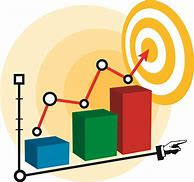

In [27]:
ypred1=dt.predict(xtest)
ypred2=rf.predict(xtest)
ypred3=kn.predict(xtest)
print('Results:\n',r2_score(ytest,ypred1))
print(r2_score(ytest,ypred2))
print(r2_score(ytest,ypred3))

Results:
 0.6187995822499399
0.7921033625043569
0.7774886618829382


<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Thank u for visiting</p>


![](https://th.bing.com/th/id/OIP.3fcVhOU96zF0PZAyuuDjqgHaFS?w=271&h=194&c=7&r=0&o=5&pid=1.7)